## Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

## Loading the data

In [2]:
# read the dataset
data = pd.read_csv('./datasets/Datains - Marcella - Price Monitoring TP-Link_TP-Link Price Monitoring_Table.csv', low_memory=False)

# get a glimpse of the Dataset
data.head()

,Date,Last Crawling,SKU Name,Product Name,Url Product,Seller,Merchant,Stock,Item Condition,Filter,Flag,Bottom Price,Original Price,Discount,Selling Price,Discrepancy,Sales Quantity,Sales Revenue
0,"Oct 22, 2022","Oct 22, 2022",TL WR840N,TP-Link TL-WR840N 2 Antenna 300Mbps Wireless N...,https://tokopedia.com/ccplace/tp-link-tl-wr840...,ccplace shop,tokopedia,In Stock,baru,Above,Please Check,155000,231000,0,231000,0.014903,0,0
1,"Oct 22, 2022","Oct 22, 2022",TL WR840N,Promo TP-LINK TL-WR840N Wireless Router 300Mbp...,https://tokopedia.com/gilsaashopp/promo-tp-lin...,gilsaa_shopp,tokopedia,In Stock,baru,Above,Please Check,155000,218800,0,218800,0.014116,0,0
2,"Oct 22, 2022","Oct 22, 2022",TL WR840N,Tp-Link TL-WR840N 300Mbps Wireless N Speed Rou...,https://tokopedia.com/ccwinta/tp-link-tl-wr840...,ccwinta shop,tokopedia,In Stock,baru,Above,Please Check,155000,227000,0,227000,0.014645,0,0
3,"Oct 22, 2022","Oct 22, 2022",TL WR840N,JARINGAN TP-LINK TL-WR 840N TL-WR840N 300MBps ...,https://tokopedia.com/belsa/jaringan-tp-link-t...,BELSA_SHOP,tokopedia,In Stock,baru,Above,Please Check,155000,263000,0,263000,0.016968,0,0
4,"Oct 22, 2022","Oct 22, 2022",TL WR840N,TPLink TL-WR840N Router Wireless WiFi 300Mbps ...,https://tokopedia.com/ccwinta/tplink-tl-wr840n...,ccwinta shop,tokopedia,In Stock,baru,Above,Please Check,155000,236000,0,236000,0.015226,0,0


## Exploring the Dataset

In [48]:
# get numerical columns of the dataset
data.describe()

,Bottom Price,Selling Price,Discrepancy,Sales Quantity,Sales Revenue
count,32772.0,3.277200e+04,32772.000000,32772.000000,3.277200e+04
mean,155000.0,2.682624e+05,0.017166,13.306603,2.082037e+06
std,0.0,3.857990e+05,0.024959,353.210553,5.482303e+07
min,155000.0,2.500000e+04,0.000000,0.000000,0.000000e+00
25%,155000.0,2.140000e+05,0.013806,0.000000,0.000000e+00
50%,155000.0,2.420000e+05,0.015613,0.000000,0.000000e+00
75%,155000.0,2.870000e+05,0.018516,0.000000,0.000000e+00
max,155000.0,5.550000e+07,3.580645,33740.000000,5.229700e+09


C:\Users\sitia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])
C:\Users\sitia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\sitia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])


KeyboardInterrupt: 

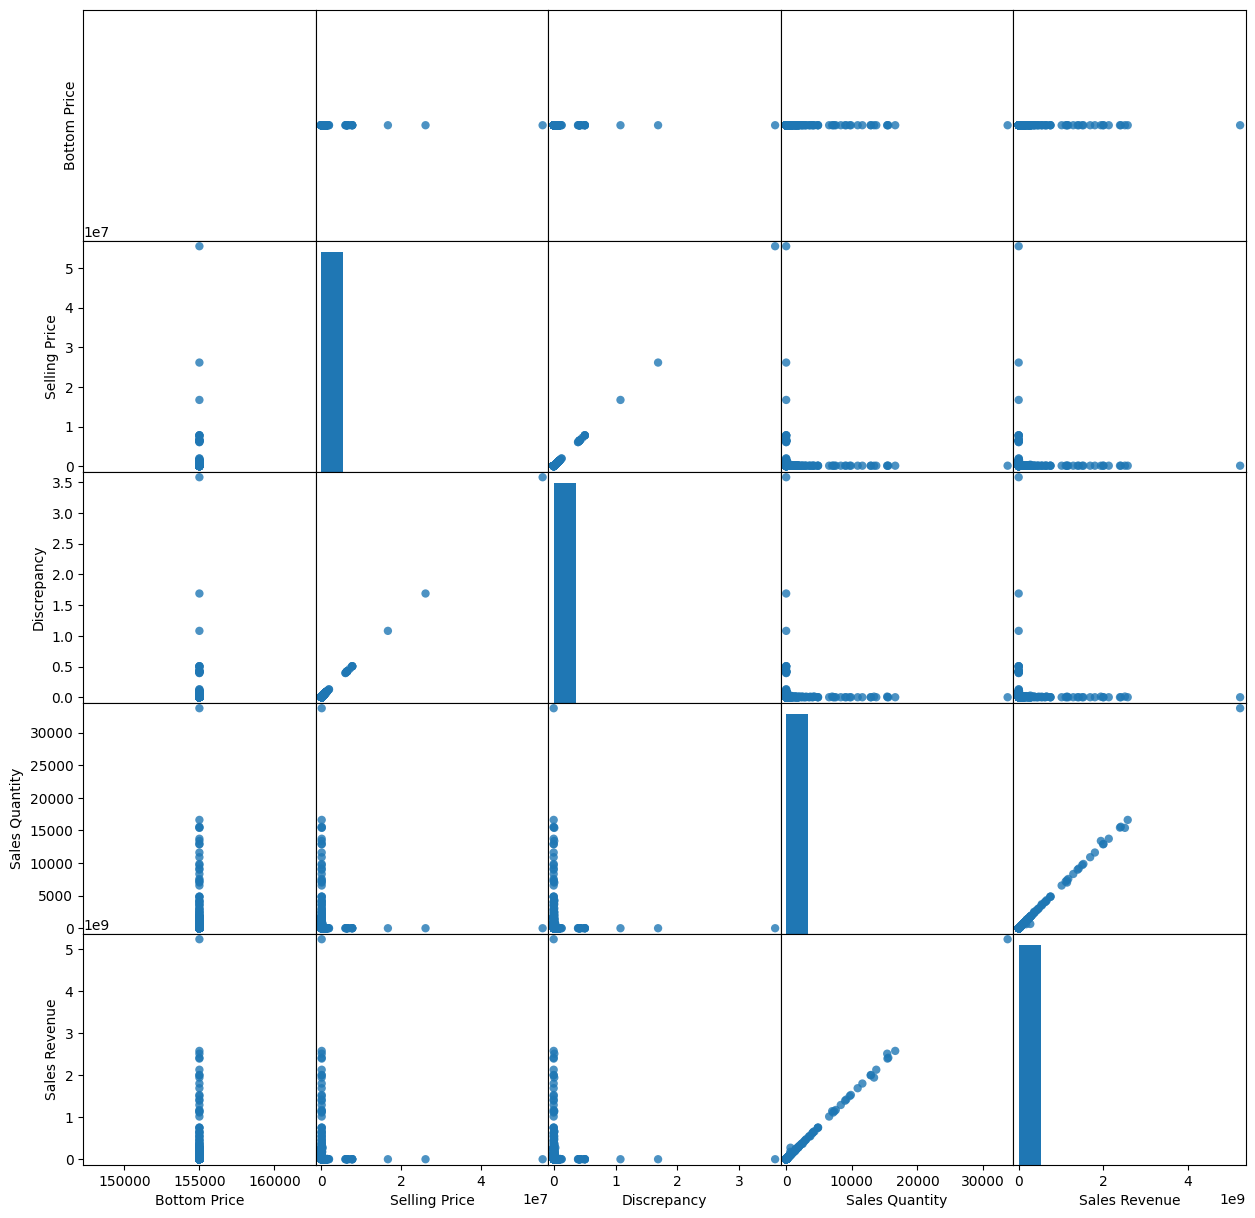

In [49]:
scatter_matrix(data, alpha=0.8, figsize=(15, 15), diagonal='hist', marker='o', grid=True)
plt.show()

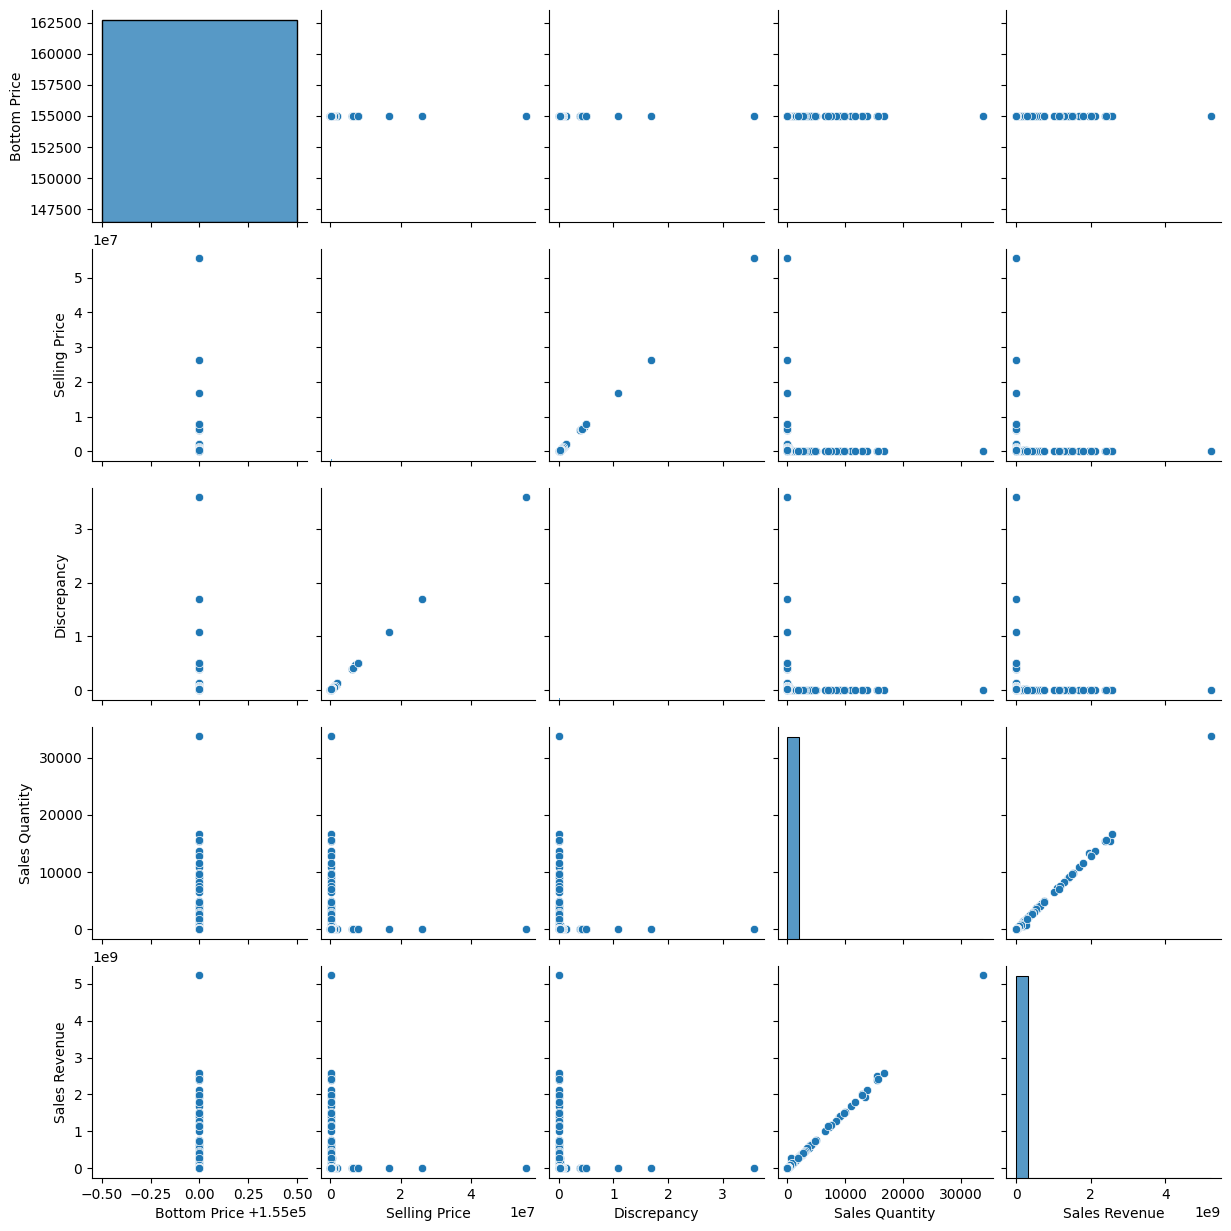

In [ ]:
# get paired plots pattern
sns.pairplot(data)

The closest pattern to the pattern of a regression line for predicting the selling price is the third rows of the second column. Which features the Discrepancy as the independent variable

In [3]:
# Clean up the original price data
discrepancy = data["Discrepancy"]
discrepancy = pd.to_numeric(discrepancy, errors='coerce')
discrepancy = discrepancy.bfill()

# Clean up the selling price data
selling_price = data["Selling Price"]
selling_price = pd.to_numeric(selling_price, errors='coerce')
selling_price = selling_price.bfill()

In [4]:
X = np.asarray(discrepancy.values.tolist())
y = np.asarray(selling_price.values.tolist())

To prove the seaborn's pairplot, we drew the scatterplot using matplotlib's pyplot

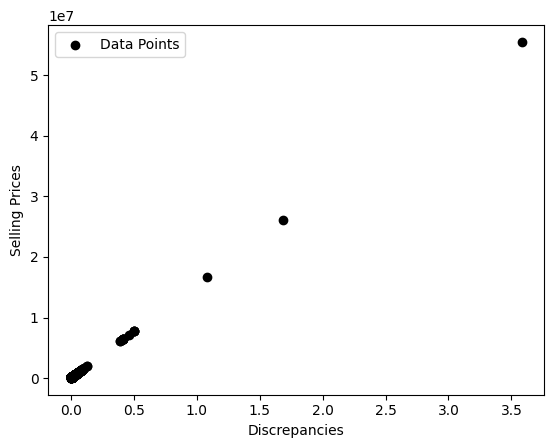

In [ ]:
plt.scatter(X, y, color="black", label="Data Points")
plt.xlabel("Discrepancies")
plt.ylabel("Selling Prices")
plt.legend()
plt.show()

# Splitting the data into training and testing

In [7]:
def train_test_split(X: np.ndarray, y: np.ndarray, test_size=.2, random_state=0):
    np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    data_test_size = int(X.shape[0] * test_size)
    train_indices = indices[data_test_size:]
    test_indices = indices[:data_test_size]
    
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    return X_train, y_train, X_test, y_test

In [8]:
X_train, y_train, X_test, y_test = train_test_split(X, y, random_state=1000)

6554
26218


## Processing the Data
The linear regression's slope follows the following formula:

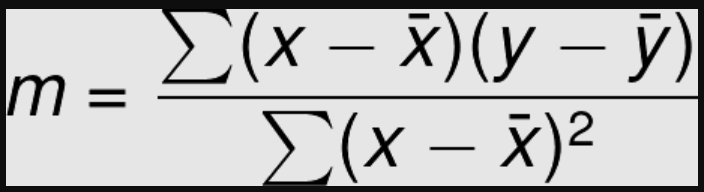

- m = slope
- X = dependent variable
- y = independent variable

## Making the model

To predict the target, we use the following formula:

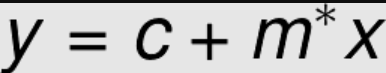

- y = target
- c = intercept, shows the point where the estimated regression line crosses the 𝑦 axis
- m = slope
- x = input data point

In [ ]:
class LinearRegression:
    def __init__(self) -> None:
        self.m = None
        self.c = None

    def fit(self, X_train, y_train):
        mean_X = np.mean(X_train)
        mean_y = np.mean(y_train)
        
        numerator = np.sum((X_train - mean_X) * (y_train - mean_y))
        denominator = np.sum((X_train - mean_X) ** 2)
        self.m = numerator / denominator
        self.c = mean_y - (self.m * mean_X)
    
    def predict(self, X):
        # formula: y = c + mx
        return self.c + self.m * X
    
    def mean_absolute_percentage_error(self, y_pred, y_true):
        mape = np.mean(np.abs((y_true - y_pred) / y_true))
        return mape * 100 # Get the percentage
            

In [ ]:
# Initializing the model
model = LinearRegression()

# Fitting (training) the model
model.fit(X_train, y_train)

# Making the predictions
predictions = model.predict(X_test)

## Visualizing the predictions

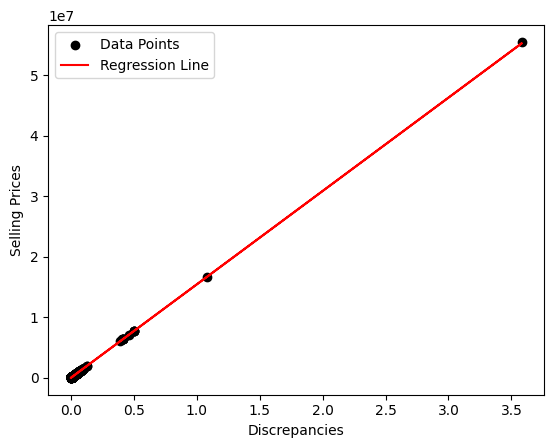

In [ ]:
plt.scatter(X_test, y_test, color="black", label="Data Points")
plt.plot(X_test, predictions, color="red", label="Regression Line")
plt.xlabel("Discrepancies")
plt.ylabel("Selling Prices")
plt.legend()
plt.show()

## Evaluating the model
We can use the following Mean Absolute Percentage Error (MAPE) formula to get the accuration and evaluate our model with it

In [ ]:
mape = model.mean_absolute_percentage_error(predictions, y_test)
print(f"Mean Absolute Percentage Error (MAPE): {int(mape)}%")

Mean Absolute Percentage Error (MAPE): 2%
